In [1]:
# import 

# data loading/handling
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# train/test split
from sklearn.model_selection import train_test_split

# model
from sklearn.linear_model import SGDClassifier

# evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

# constant
DATASET_LINK = 'data/heart_2020_cleaned.csv'

In [2]:
# some plotting configuration

# default figsize
plt.rc('figure', figsize=(10, 5))

# customize the font
font_options = {'family': 'monospace',
                'weight': 'bold',
                'size': 13}

plt.rc('font', **font_options)

sns.set(style="whitegrid")

# Get the Data

In [3]:
df = pd.read_csv(DATASET_LINK)

In [4]:
# preview of the data
df.head(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [5]:
# some statistical information like:
# number of rows, columns, data types, non-null count, memory,... 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

# Discover and Visualize the Data to gain insight

In [6]:
# create a copy of the data so we can test without harming the dataset
data = df.copy()

## Columns Description


**HeartDisease**: Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)


**BMI**: Body Mass Index


**Smoking**: Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes]


**AlcoholDrinking**: Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week)


**Stroke**: (Ever told) (you had) a stroke?


**PhysicalHealth**: Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (0-30 days)


**MentalHealth**: Thinking about your mental health, for how many days during the past 30 days was your mental health not good? (0-30 days)


**DiffWalking**: Do you have serious difficulty walking or climbing stairs?


**Sex**: Are you male or female?


**AgeCategory**: Fourteen-level age category

**Race**: Imputed race/ethnicity value


**Diabetic**: (Ever told) (you had) diabetes?


**PhysicalActivity**: Adults who reported doing physical activity or exercise during the past 30 days other than their regular job


**GenHealth**: Would you say that in general your health is...


**SleepTime**: On average, how many hours of sleep do you get in a 24-hour period?


**Asthma**: (Ever told) (you had) asthma?


**KidneyDisease**: Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?


**SkinCancer**: (Ever told) (you had) skin cancer?


---

## HeartDisease (Target variable)


Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)

In [7]:
# this is a categorical value, so we can count its value
data["HeartDisease"].value_counts()

No     292422
Yes     27373
Name: HeartDisease, dtype: int64

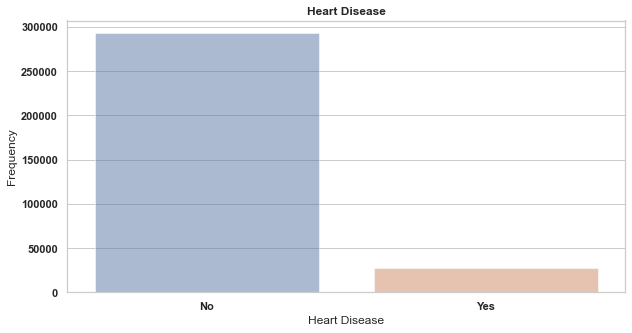

In [8]:
# Heart Disease count plot

fig = plt.figure(figsize=(10, 5))
plot = sns.countplot(x=data["HeartDisease"], data=data, alpha=0.5)
_ = plot.set_title("Heart Disease", fontweight='bold')
_ = plot.set_ylabel("Frequency")
_ = plot.set_xlabel("Heart Disease")

We can then see that the number of "No" is very large compare to the number of "Yes" (this mean that our data is imbalance). So we need to be careful when spliting the data into training/testing set, because there may be times where we have a dataset with no "Yes" instance in it.

---

## BMI


Body Mass Index (BMI): is a value derived from the mass and height of a person. The BMI is defined:


$BMI = \frac{mass}{height^2} (kg/m^2)$

In [9]:
# dataset's BMI statistics
data["BMI"].describe()

count    319795.000000
mean         28.325399
std           6.356100
min          12.020000
25%          24.030000
50%          27.340000
75%          31.420000
max          94.850000
Name: BMI, dtype: float64

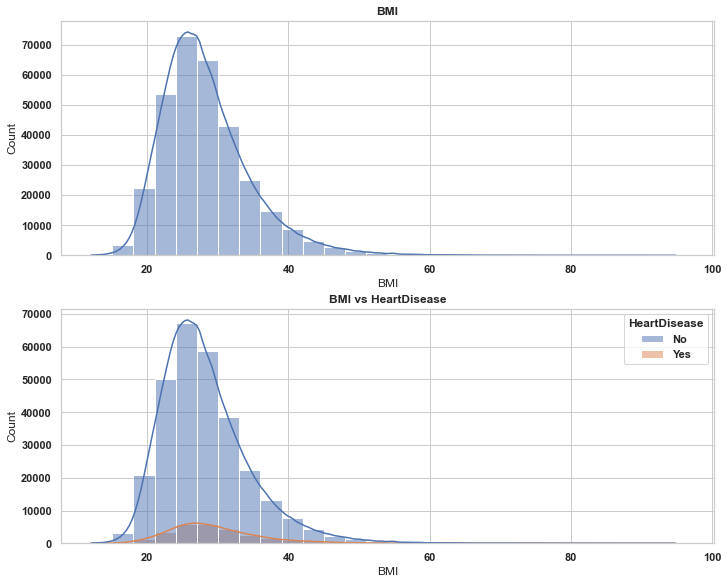

In [10]:
# BMI histogram

fig, ax = plt.subplots(2, 1, figsize=(10, 8), constrained_layout=True)
plot1 = sns.histplot(x="BMI", data=data, binwidth=3, kde=True, ax=ax[0], alpha=0.5)
plot2 = sns.histplot(x="BMI", data=data, hue="HeartDisease", binwidth=3, kde=True, ax=ax[1], alpha=0.5)

_ = plot1.set_title('BMI', fontweight='bold')
_ = plot2.set_title('BMI vs HeartDisease', fontweight='bold')

In [11]:
data["BMI"].quantile(0.5), data["BMI"].quantile(0.95)

(27.34, 40.18)

We can infer that 90% of the population's BMI is in the range (27, 40)


---

## Smoking


Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes]

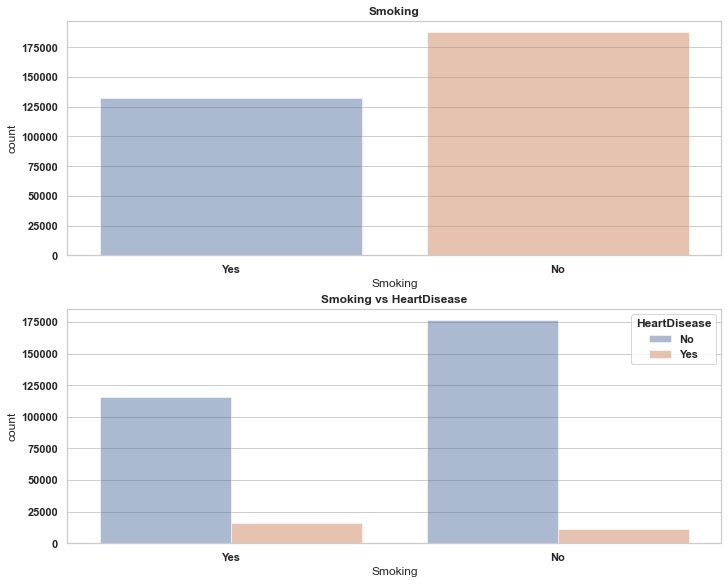

In [12]:
# Smoking bar plot

fig, ax = plt.subplots(2, 1, figsize=(10, 8), constrained_layout=True)

plot1 = sns.countplot(x='Smoking', data=data, ax=ax[0], alpha=0.5)
plot2 = sns.countplot(x='Smoking', data=data, hue='HeartDisease', ax=ax[1], alpha=0.5)
_ = plot1.set_title('Smoking', fontweight='bold')
_ = plot2.set_title('Smoking vs HeartDisease', fontweight='bold')

We can infer that smoking has unclear correlation with HeartDisease. (the proportions are similar).


This part would be advisable to consult an expert.


---

## AlcoholDrinking


Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week)

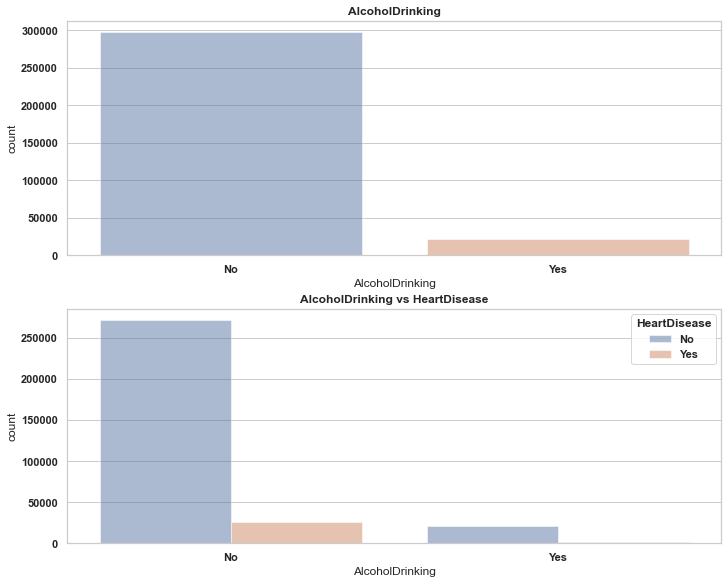

In [13]:
# AlcoholDrinking bar plot

fig, ax = plt.subplots(2, 1, figsize=(10, 8), constrained_layout=True)

plot1 = sns.countplot(x='AlcoholDrinking', data=data, ax=ax[0], alpha=0.5)
plot2 = sns.countplot(x='AlcoholDrinking', data=data, hue='HeartDisease', ax=ax[1], alpha=0.5)
_ = plot1.set_title('AlcoholDrinking', fontweight='bold')
_ = plot2.set_title('AlcoholDrinking vs HeartDisease', fontweight='bold')

This suggest that not-consuming alcohol has a correlation with suffering heart disease. (questionable)


---

In [14]:
# Since the number of instances that have heart disease is too small compare to instances that not have heart disease
# it's not very useful to continue draw graphs to find correlation
# instead we should just jump into training our algorithm
# since our data is already cleaned

data.isnull().sum() # no null values 

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

# Preprocessing

In [15]:
# copy the data so we don't mess with it
data = df.copy()

## Process Categorical Data

In [16]:
# maybe group BMI into categorical (considerable)


In [17]:
# change types of some attribute to Categorical to boost performance
# not needed if we already use LabelEncoder()
data['AgeCategory'] = data['AgeCategory'].astype('category')

In [18]:
# change all categorical columns into numerical form
encoder = LabelEncoder()

data.iloc[:,0] = encoder.fit_transform(data.iloc[:,0].values)
data.iloc[:,2] = encoder.fit_transform(data.iloc[:,2].values)
data.iloc[:,3] = encoder.fit_transform(data.iloc[:,3].values)
data.iloc[:,4] = encoder.fit_transform(data.iloc[:,4].values)
data.iloc[:,7] = encoder.fit_transform(data.iloc[:,7].values)
data.iloc[:,8] = encoder.fit_transform(data.iloc[:,8].values)
data.iloc[:,9] = encoder.fit_transform(data.iloc[:,9].values)
data.iloc[:,10] = encoder.fit_transform(data.iloc[:,10].values)
data.iloc[:,11] = encoder.fit_transform(data.iloc[:,11].values)
data.iloc[:,12] = encoder.fit_transform(data.iloc[:,12].values)
data.iloc[:,13] = encoder.fit_transform(data.iloc[:,13].values)
data.iloc[:,15] = encoder.fit_transform(data.iloc[:,15].values)
data.iloc[:,16] = encoder.fit_transform(data.iloc[:,16].values)
data.iloc[:,17] = encoder.fit_transform(data.iloc[:,17].values)

In [19]:
# result
data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,5,2,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,5,2,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,5,0,1,4,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,1,8,3,2,0,1,6.0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,1,3,3,0,1,4,5.0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,0,5,3,0,1,2,6.0,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,0,1,3,0,0,2,12.0,0,0,0


## Data Scaling


MinMaxScaler is used to keep the 0 and 1 like range limit (May Use OneHotEncoder if you prefer).

In [20]:
scaler = MinMaxScaler()
columns_to_scale = ['BMI', 'PhysicalHealth', 'MentalHealth', 'AgeCategory', 'Race', 'Diabetic', 'GenHealth', 'SleepTime']
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])
processes_data = data

In [21]:
# result
processes_data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,0.055294,1,0,0,0.100000,1.0,0,0,0.583333,1.0,0.666667,1,1.00,0.173913,1,0,1
1,0,0.100447,0,0,1,0.000000,0.0,0,0,1.000000,1.0,0.000000,1,1.00,0.260870,0,0,0
2,0,0.175782,1,0,0,0.666667,1.0,0,1,0.750000,1.0,0.666667,1,0.25,0.304348,1,0,0
3,0,0.147169,0,0,0,0.000000,0.0,0,0,0.916667,1.0,0.000000,0,0.50,0.217391,0,0,1
4,0,0.141132,0,0,0,0.933333,0.0,1,0,0.333333,1.0,0.000000,1,1.00,0.304348,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,0.185802,1,0,0,0.233333,0.0,1,1,0.666667,0.6,0.666667,0,0.25,0.217391,1,0,0
319791,0,0.215139,1,0,0,0.000000,0.0,0,1,0.250000,0.6,0.000000,1,1.00,0.173913,1,0,0
319792,0,0.147531,0,0,0,0.000000,0.0,0,0,0.416667,0.6,0.000000,1,0.50,0.217391,0,0,0
319793,0,0.250996,0,0,0,0.000000,0.0,0,0,0.083333,0.6,0.000000,0,0.50,0.478261,0,0,0


## Split data into X and y variables

In [22]:
# copy the new dataset so we don't mess things up
data = processes_data.copy()

In [23]:
X = data.iloc[:, 1:]
y = data.iloc[:, 0]

## Split data into train/test sets

In [24]:
# maybe consider the fact that number of 'No' is way larger than 'Yes'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.02, random_state=42)

In [25]:
# Creating a X_test and y_test copy. I will use it after
# these dataset contains unbalance test data
X_test_ = X_test.copy()
y_test_ = y_test.copy()

# Training a model

## Train models

In [26]:
# treeClassifier = DecisionTreeClassifier()
# treeClassifier.fit(X_train, y_train)

# maybe using something simpler
# let's use the Stochastic Gradient Descent (SGD) classifier
# this class has the advantage of handling very large datasets efficiently (which makes it well-suited for online learning)
sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

## Make predictions

In [27]:
# we shouldn't be touching this test set but since it's going to be re-split later on, we can accept it in this situation
y_pred = sgd_clf.predict(X_test)

## Evaluate result

In [28]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy, recall, f1

(0.9097873671044403, 0.0, 0.0)

Precision can be interpreted as the accuracy of the positive predictions.


$precision = \frac{TP}{TP + FP}$


Recall can be interpreted as the ratio of positive instances that are correctly detected by the classifier.


$recall = \frac{TP}{TP + FN}$


Simply put, recall demonstrates the algorithm's ability to detect a given class in general, while precision demonstrates the ability to distinguish this class from other classes.


$Recall = 0$ means our score can't detect positive classes (which means that it always predict 'No').

## Confusion Matrix

In [29]:
conf_mat = confusion_matrix(y_test, y_pred)

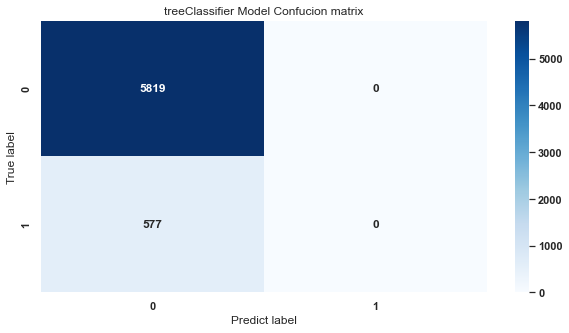

In [30]:
#Confution matrix plot
sns.heatmap(conf_mat, cmap='Blues', annot=True, fmt="d")

plt.title('treeClassifier Model Confucion matrix')
plt.xlabel('Predict label')
plt.ylabel('True label')
plt.show()

looks like our model is not doing well (maybe the model only learn to say 'No').


This is because our data is unbalance (i.e. too little 'Yes' instances). So when we split the data, there may be chances that no or too little 'Yes' instances exist in the training set. Therefore, it's nearly impossible for our model to work properly.


---

# Improve the model

## Re-Spliting the dataset


We will split the dataset so that the train/test split has enough 'Yes'/'No' value so our algorithm can work properly.


The fastest way to do this is to resample the 'Yes' instances so our data becomes balance, then concatenate them together.

In [31]:
data = processes_data.copy() # to avoid mess up things

In [32]:
# split the data into 2 part
class_1 = data[data["HeartDisease"] == 1]
class_0 = data[data["HeartDisease"] == 0]

In [33]:
# resample the data
class_1 = class_1.sample(len(class_0), replace=True)
data = pd.concat([class_0, class_1], axis=0)
data["HeartDisease"].value_counts() # now our data is no longer imbalance

0    292422
1    292422
Name: HeartDisease, dtype: int64

In [34]:
#Separate the data into X and y variables 
X = data.iloc[:,1:]
y = data.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.02, random_state=42)

## Train and Test the new data

In [35]:
# now we train our normal like before to see the difference
sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [36]:
# again, we should not be touching the test set until we are sure that our model is good
# but since we will use another dataset to test this data, it's acceptable
y_pred = sgd_clf.predict(X_test)

In [37]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy, recall, f1

(0.7523296571770539, 0.7501280081925243, 0.752117737657226)

this set of numbers looks more interesting than the previous one. Why?

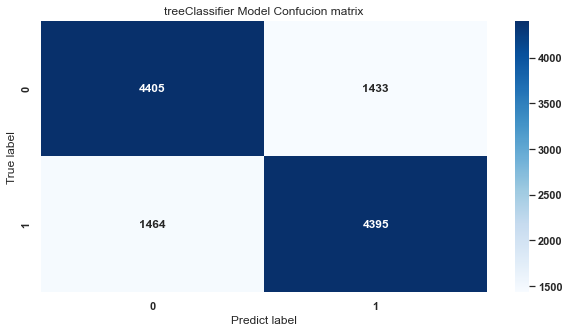

test size = 11697


In [38]:
#Confution matrix plot
conf_mat = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_mat, cmap='Blues', annot=True, fmt="d")
plt.title('treeClassifier Model Confucion matrix')
plt.xlabel('Predict label')
plt.ylabel('True label')
plt.show()
print('test size =', len(y_test))

Now this looks more promising. The model performs better and with a pretty high evaluation scores.

# Evaulate on the Test set (confidence)